# CSCI 6364 Machine Learning - Assignment 1
## Abde Manaaf Ghadiali - G29583342

Our Aim with this Assignment is to implement a machine learning algorithm from scratch and predict the number of Streams using the “Most Streamed Spotify Songs 2023” data using various features such as song's popularity across different music platforms, artist involvement and attributes, audio features, temporal features, etc.

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from typing_extensions import Self, Generator
from scipy.stats import pearsonr

import statistics
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

### Reading Data

In [2]:
input_data = pd.read_csv('./spotify-2023.csv', encoding='ISO-8859-1')

# Cleaning the target variable of invalid values
input_data['streams'] = pd.to_numeric(input_data['streams'], errors='coerce')
input_data = input_data[~input_data['streams'].isna()]

input_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


### Exploratory Data Analysis (EDA)

Raw Data has two features of data type object. This is because of a value that contains a ',' in the integer.

In [3]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    object 
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    object 
 14  bpm                   952 non-null    int64  
 15  key                   857 no

In [4]:
input_data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [5]:
input_data.describe(include='all')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952,952,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952,952.000000,902,952.000000,857,952,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
unique,942,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348,NaN,198,NaN,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Take My Breath,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,343,NaN,120,549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,NaN,2.669118,NaN,122.553571,NaN,NaN,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,NaN,NaN,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,NaN,6.038152,NaN,28.069601,NaN,NaN,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,NaN,0.000000,NaN,65.000000,NaN,NaN,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,NaN,0.000000,NaN,99.750000,NaN,NaN,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,NaN,0.000000,NaN,121.000000,NaN,NaN,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,NaN,2.000000,NaN,140.250000,NaN,NaN,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000


#### Correlation Heatmap

This visualization elucidates the interrelationships among features by illustrating their correlations. It offers insights into which features are correlated with one another, aiding in the identification of potential multicollinearity issues, and informing feature selection processes.

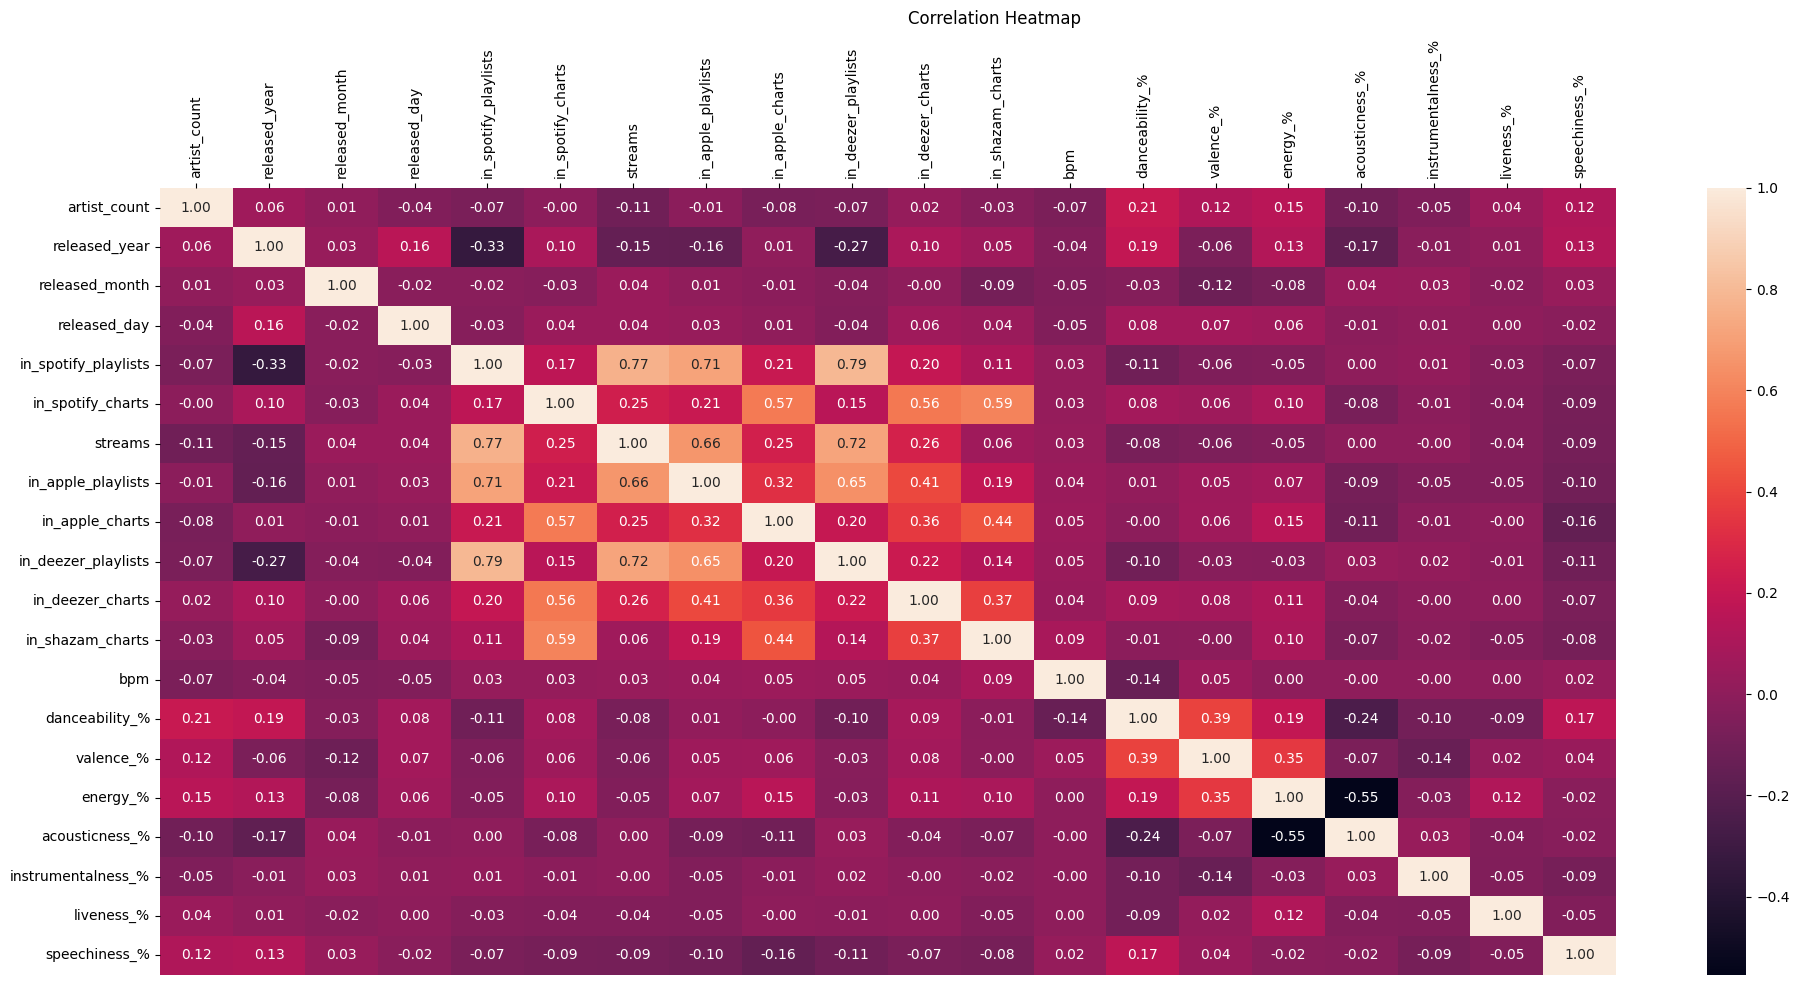

In [6]:
num_features = input_data[['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
                           'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

num_features['streams'] = pd.to_numeric(num_features['streams'], errors='coerce')
num_features['in_deezer_playlists'] = pd.to_numeric(num_features['in_deezer_playlists'], errors='coerce')
num_features['in_shazam_charts'] = pd.to_numeric(num_features['in_shazam_charts'], errors='coerce')

num_features = num_features.dropna()

fig, axes = plt.subplots(figsize=(20, 10))
sns.heatmap(num_features.corr(), annot=True, fmt='.2f').xaxis.tick_top()
axes.tick_params(axis='x', labelrotation=90)

fig.suptitle('Correlation Heatmap')
fig.tight_layout()
fig.savefig('./images/correlation_heatmap_feautures.png')

#### Univariate and Bivariate Analysis for Audio Features

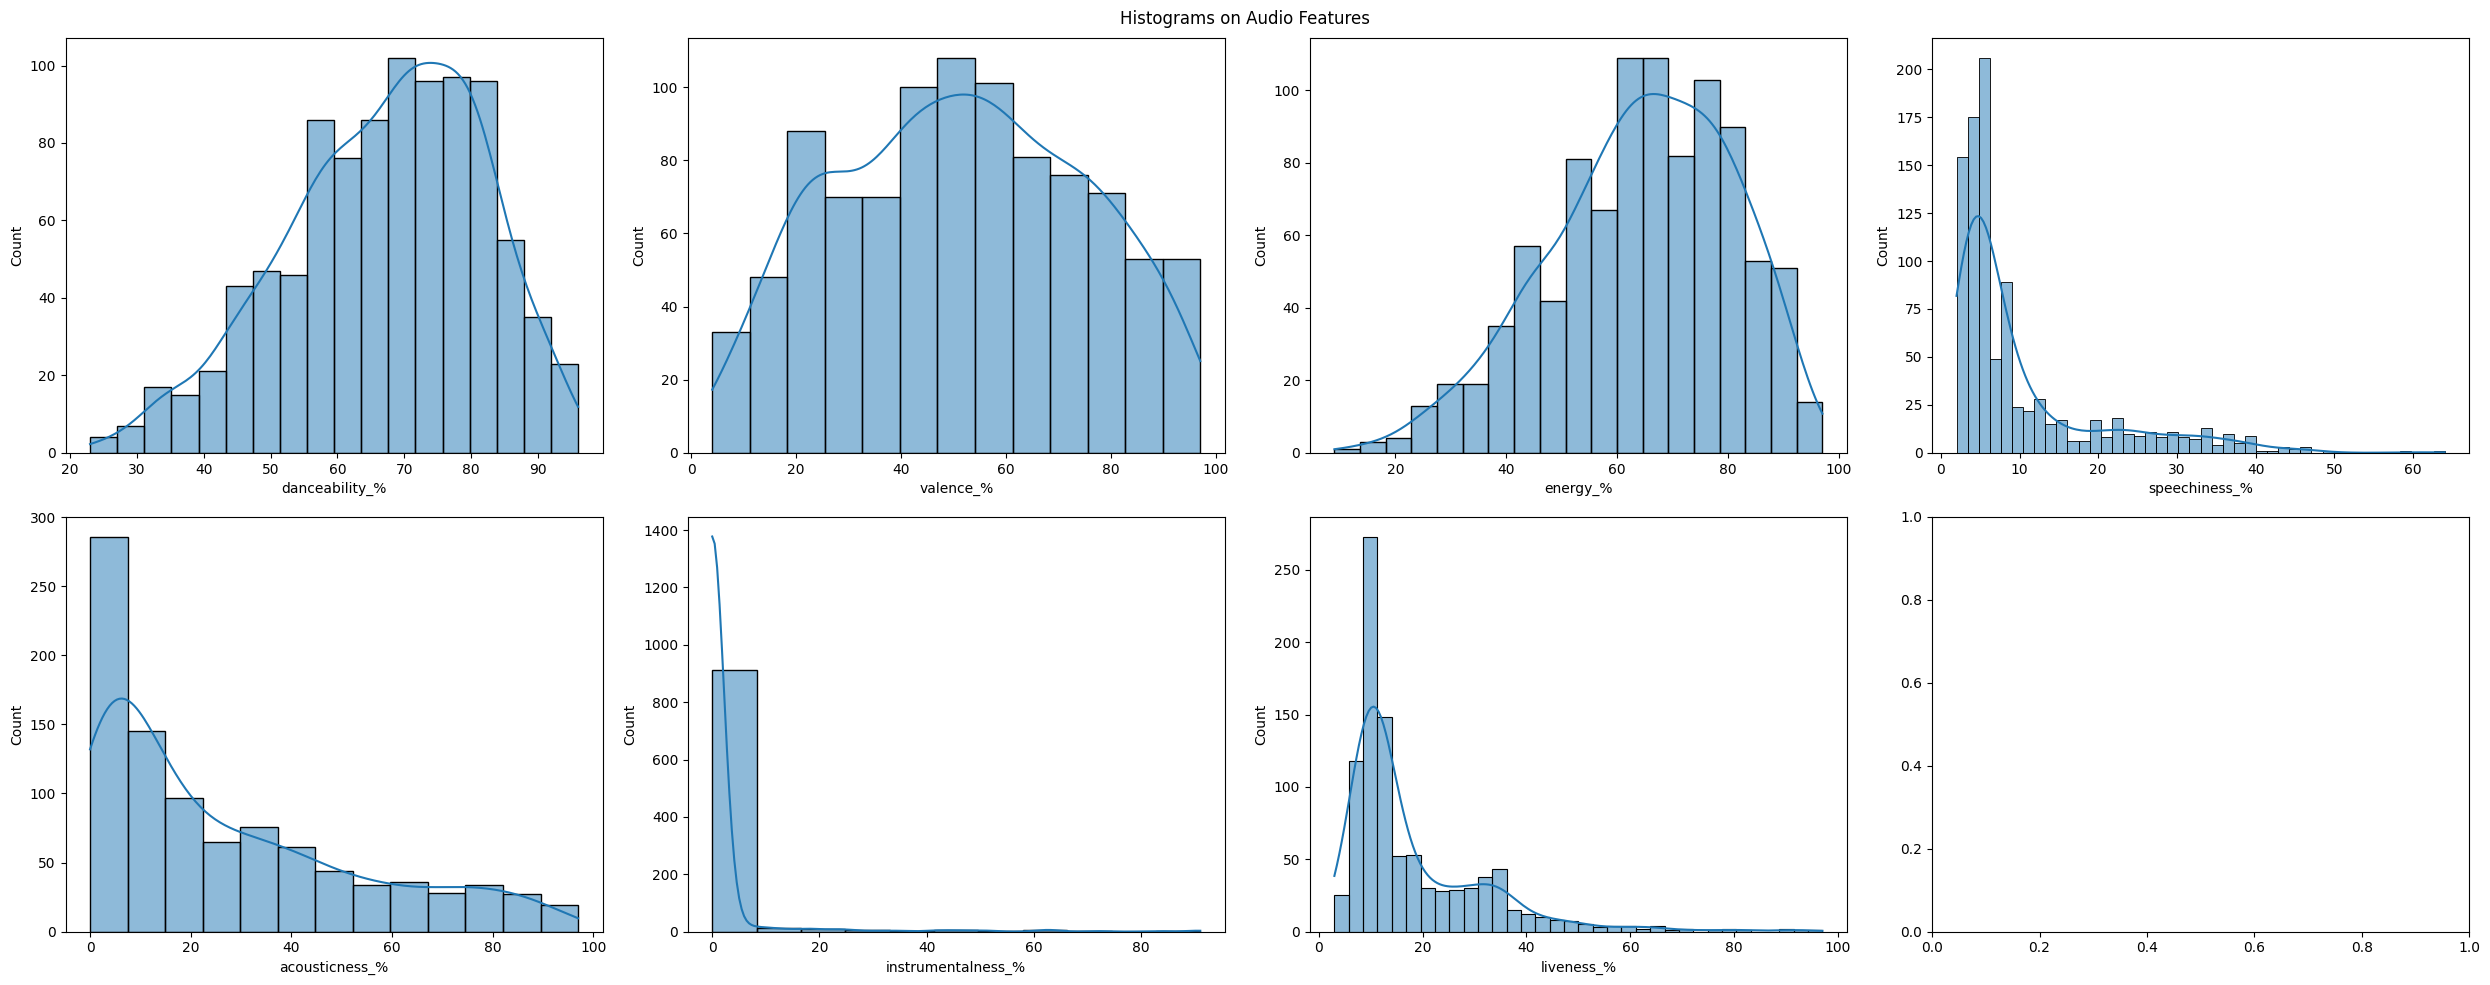

In [7]:
audio_features = input_data[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

sns.histplot(data=audio_features, x="danceability_%", kde=True, ax=axes[0, 0])
sns.histplot(data=audio_features, x="valence_%", kde=True, ax=axes[0, 1])
sns.histplot(data=audio_features, x="energy_%", kde=True, ax=axes[0, 2])
sns.histplot(data=audio_features, x="speechiness_%", kde=True, ax=axes[0, 3])

sns.histplot(data=audio_features, x="acousticness_%", kde=True, ax=axes[1, 0])
sns.histplot(data=audio_features, x="instrumentalness_%", kde=True, ax=axes[1, 1])
sns.histplot(data=audio_features, x="liveness_%", kde=True, ax=axes[1, 2])

fig.suptitle('Histograms on Audio Features')
fig.tight_layout()
fig.savefig('./images/histograms_audio_feautures.png')

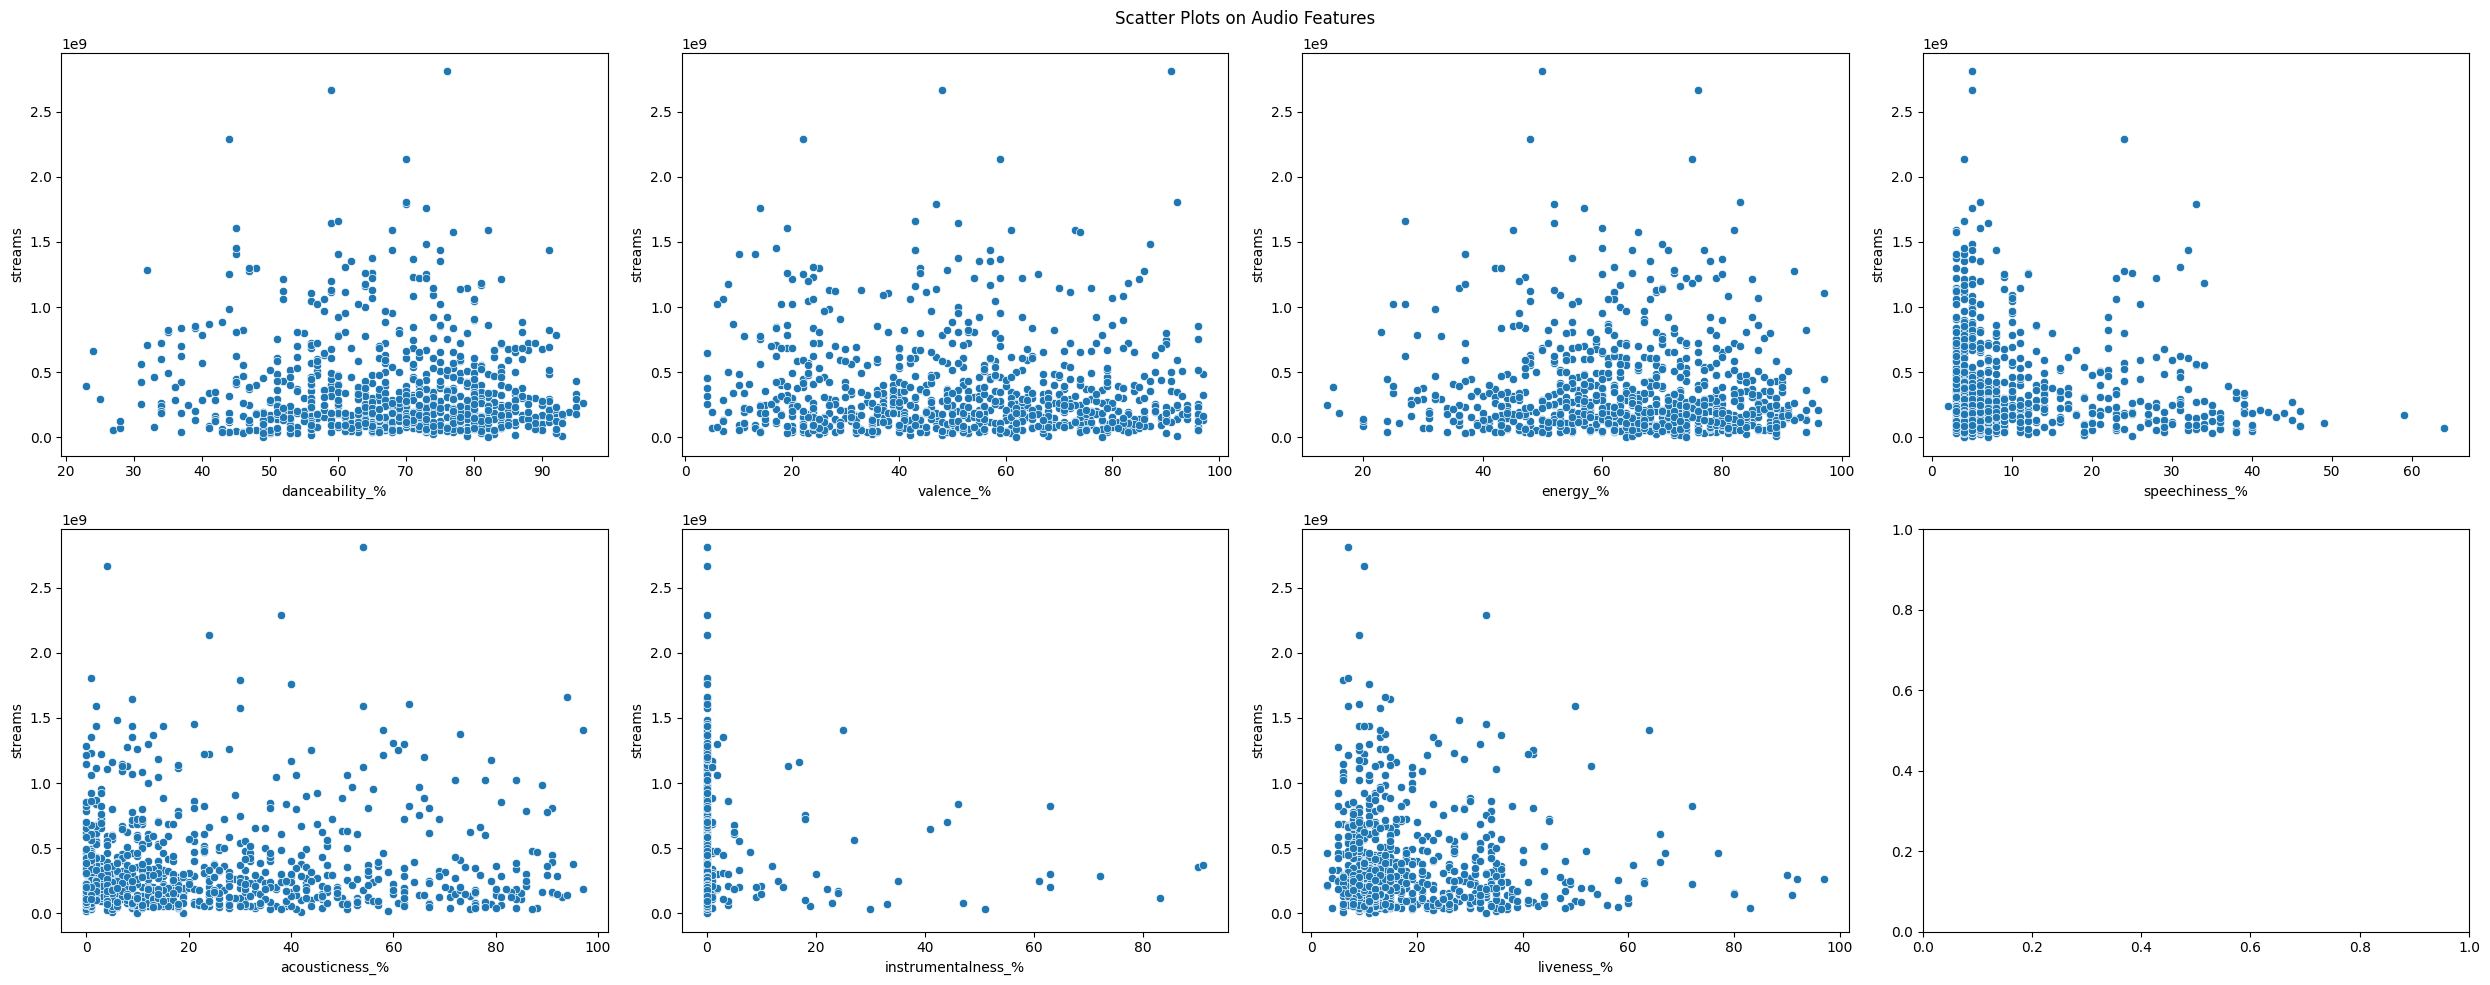

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

sns.scatterplot(data=num_features, x="danceability_%", y='streams', ax=axes[0, 0])
sns.scatterplot(data=num_features, x="valence_%", y='streams', ax=axes[0, 1])
sns.scatterplot(data=num_features, x="energy_%", y='streams', ax=axes[0, 2])
sns.scatterplot(data=num_features, x="speechiness_%", y='streams', ax=axes[0, 3])

sns.scatterplot(data=num_features, x="acousticness_%", y='streams', ax=axes[1, 0])
sns.scatterplot(data=num_features, x="instrumentalness_%", y='streams', ax=axes[1, 1])
sns.scatterplot(data=num_features, x="liveness_%", y='streams', ax=axes[1, 2])

fig.suptitle('Scatter Plots on Audio Features')
fig.tight_layout()
fig.savefig('./images/scatter_plot_audio_feautures.png')

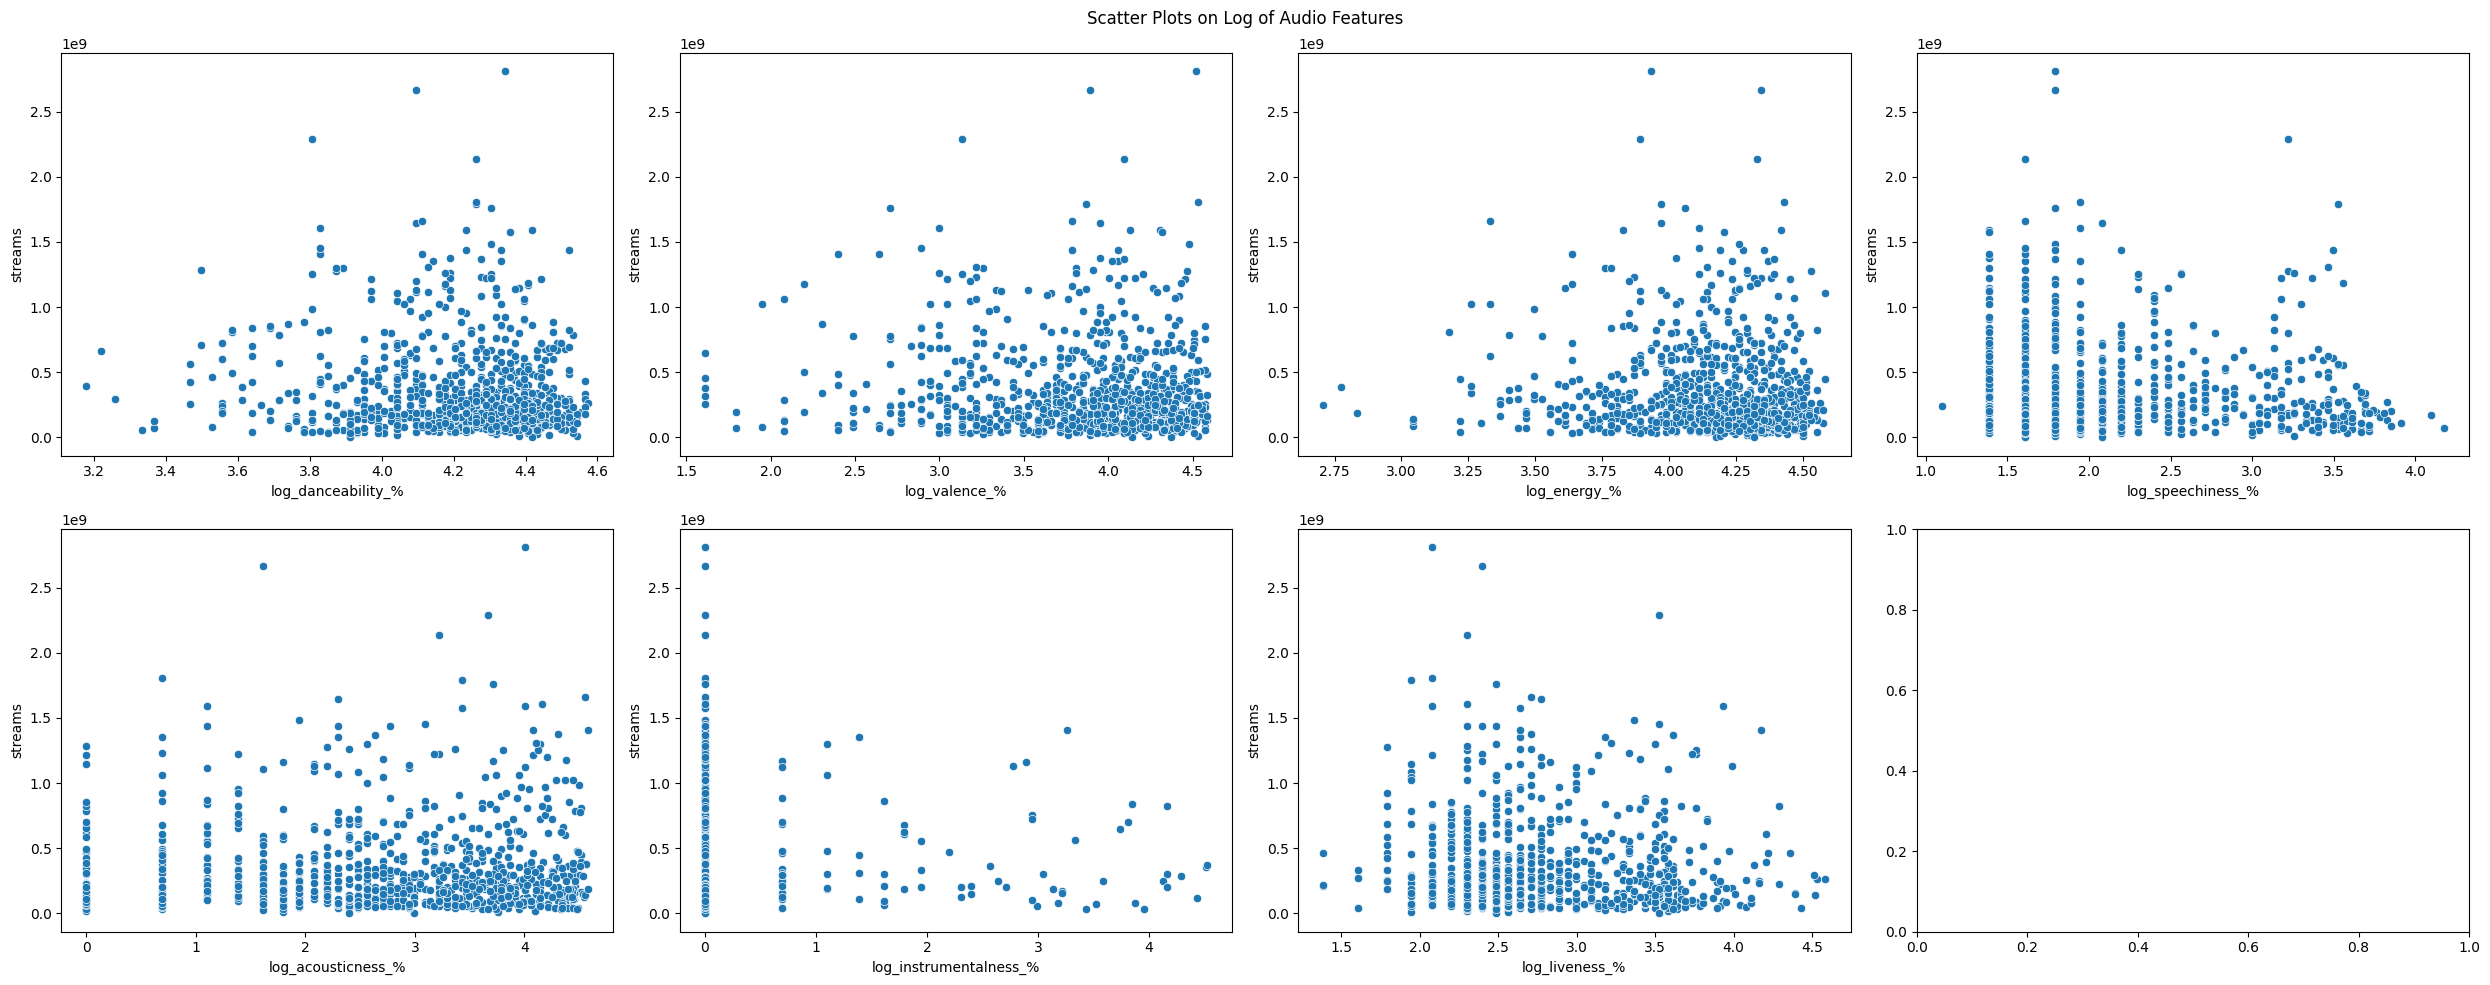

In [9]:
log_audio_features = num_features[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']]

for feat in log_audio_features.columns:
    log_audio_features[f'log_{feat}'] = np.log(log_audio_features[feat] + 1)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

sns.scatterplot(data=log_audio_features, x="log_danceability_%", y='streams', ax=axes[0, 0])
sns.scatterplot(data=log_audio_features, x="log_valence_%", y='streams', ax=axes[0, 1])
sns.scatterplot(data=log_audio_features, x="log_energy_%", y='streams', ax=axes[0, 2])
sns.scatterplot(data=log_audio_features, x="log_speechiness_%", y='streams', ax=axes[0, 3])

sns.scatterplot(data=log_audio_features, x="log_acousticness_%", y='streams', ax=axes[1, 0])
sns.scatterplot(data=log_audio_features, x="log_instrumentalness_%", y='streams', ax=axes[1, 1])
sns.scatterplot(data=log_audio_features, x="log_liveness_%", y='streams', ax=axes[1, 2])

fig.suptitle('Scatter Plots on Log of Audio Features')
fig.tight_layout()
fig.savefig('./images/scatter_plot_log_audio_feautures.png')

In [10]:
for feat in log_audio_features.columns:
    print(f'Pearson Correlation ({feat}): {pearsonr(log_audio_features[feat], log_audio_features["streams"])}')

Pearson Correlation (danceability_%): PearsonRResult(statistic=-0.07543162266865246, pvalue=0.029880413673953894)
Pearson Correlation (valence_%): PearsonRResult(statistic=-0.058455079140386036, pvalue=0.09257688154912305)
Pearson Correlation (energy_%): PearsonRResult(statistic=-0.04966579260838064, pvalue=0.15308488274753967)
Pearson Correlation (acousticness_%): PearsonRResult(statistic=0.0013286968971004504, pvalue=0.9695293276454509)
Pearson Correlation (instrumentalness_%): PearsonRResult(statistic=-0.0009670220772388386, pvalue=0.9778209938993042)
Pearson Correlation (liveness_%): PearsonRResult(statistic=-0.0387277528530451, pvalue=0.2653655312830121)
Pearson Correlation (speechiness_%): PearsonRResult(statistic=-0.09072815014008141, pvalue=0.008956024208297633)
Pearson Correlation (streams): PearsonRResult(statistic=0.9999999999999998, pvalue=0.0)
Pearson Correlation (log_danceability_%): PearsonRResult(statistic=-0.07029538318946538, pvalue=0.04302990936643309)
Pearson Correl

#### Bivariate Analysis of Popularity Features

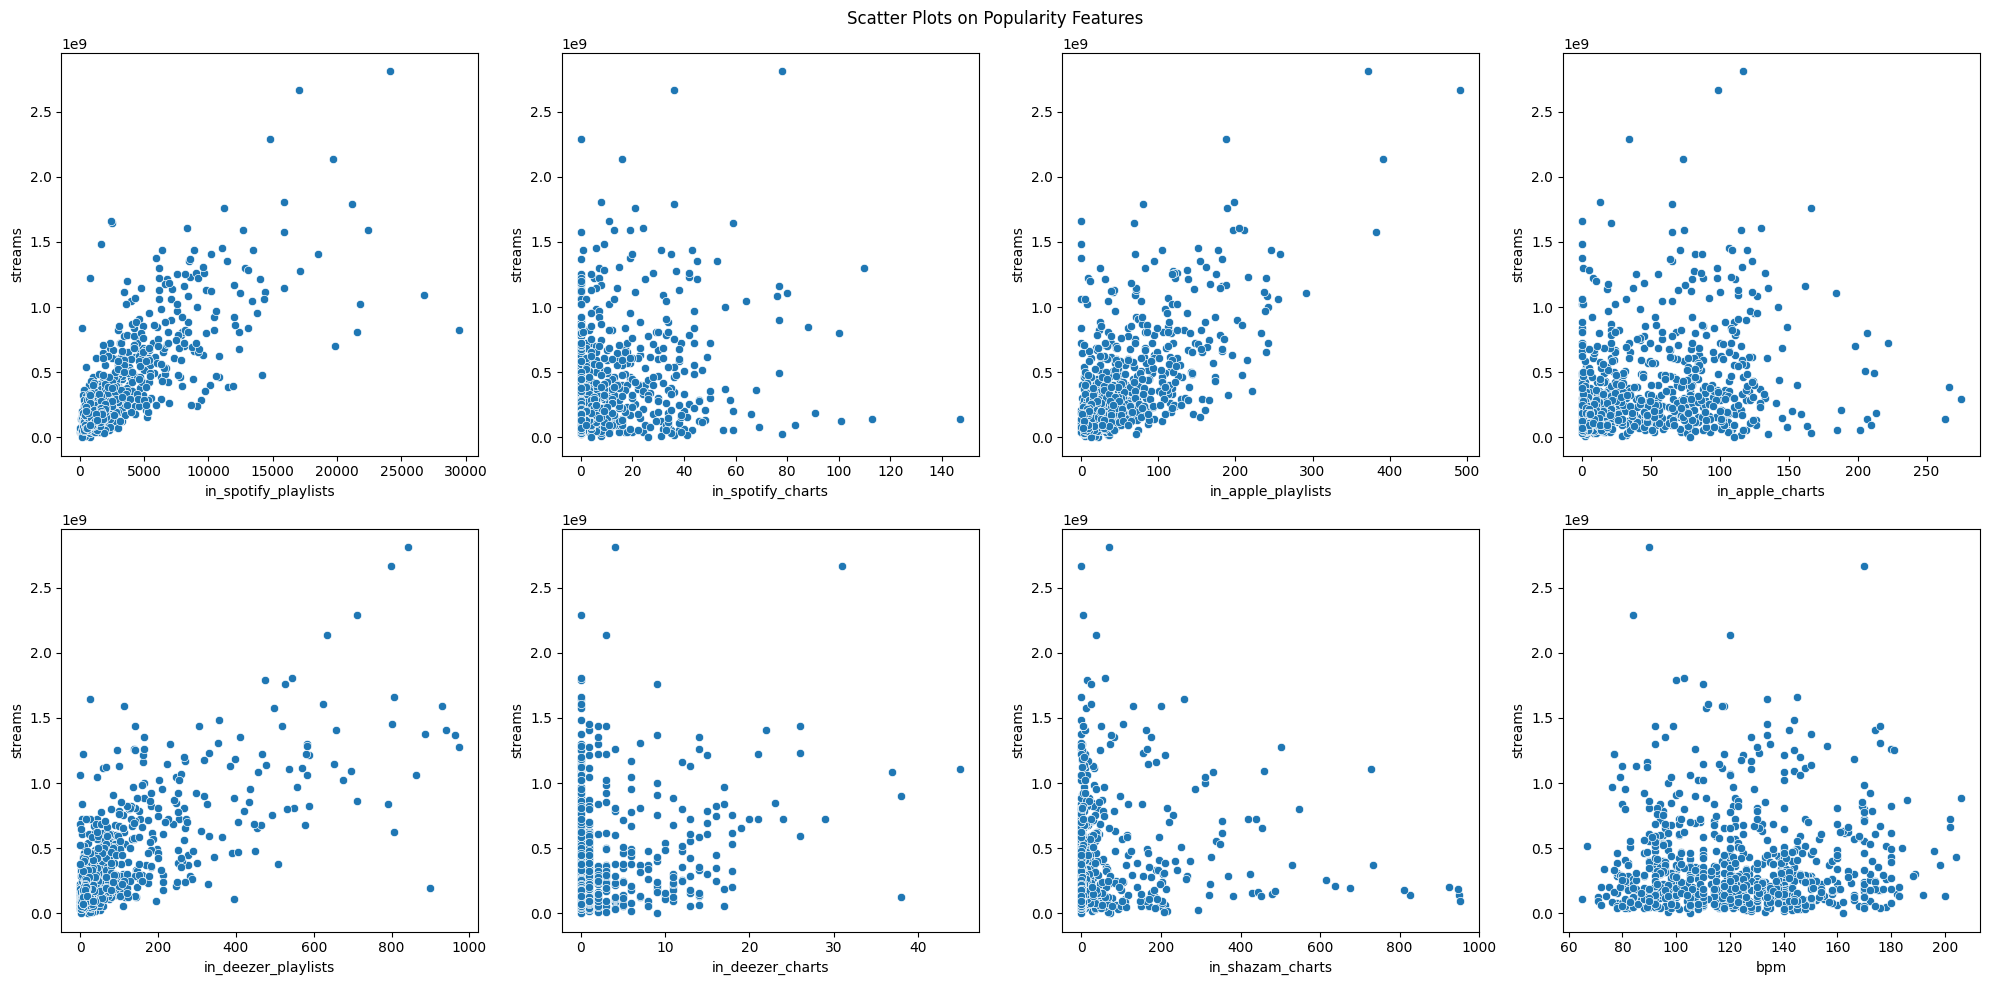

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.scatterplot(num_features, x='in_spotify_playlists', y='streams', ax=axes[0, 0])
sns.scatterplot(num_features, x='in_spotify_charts', y='streams', ax=axes[0, 1])
sns.scatterplot(num_features, x='in_apple_playlists', y='streams', ax=axes[0, 2])
sns.scatterplot(num_features, x='in_apple_charts', y='streams', ax=axes[0, 3])

sns.scatterplot(num_features, x='in_deezer_playlists', y='streams', ax=axes[1, 0])
sns.scatterplot(num_features, x='in_deezer_charts', y='streams', ax=axes[1, 1])
sns.scatterplot(num_features, x='in_shazam_charts', y='streams', ax=axes[1, 2])
sns.scatterplot(num_features, x='bpm', y='streams', ax=axes[1, 3])

fig.suptitle('Scatter Plots on Popularity Features')
fig.tight_layout()
fig.savefig('./images/scatter_plot_popularity_feautures.png')

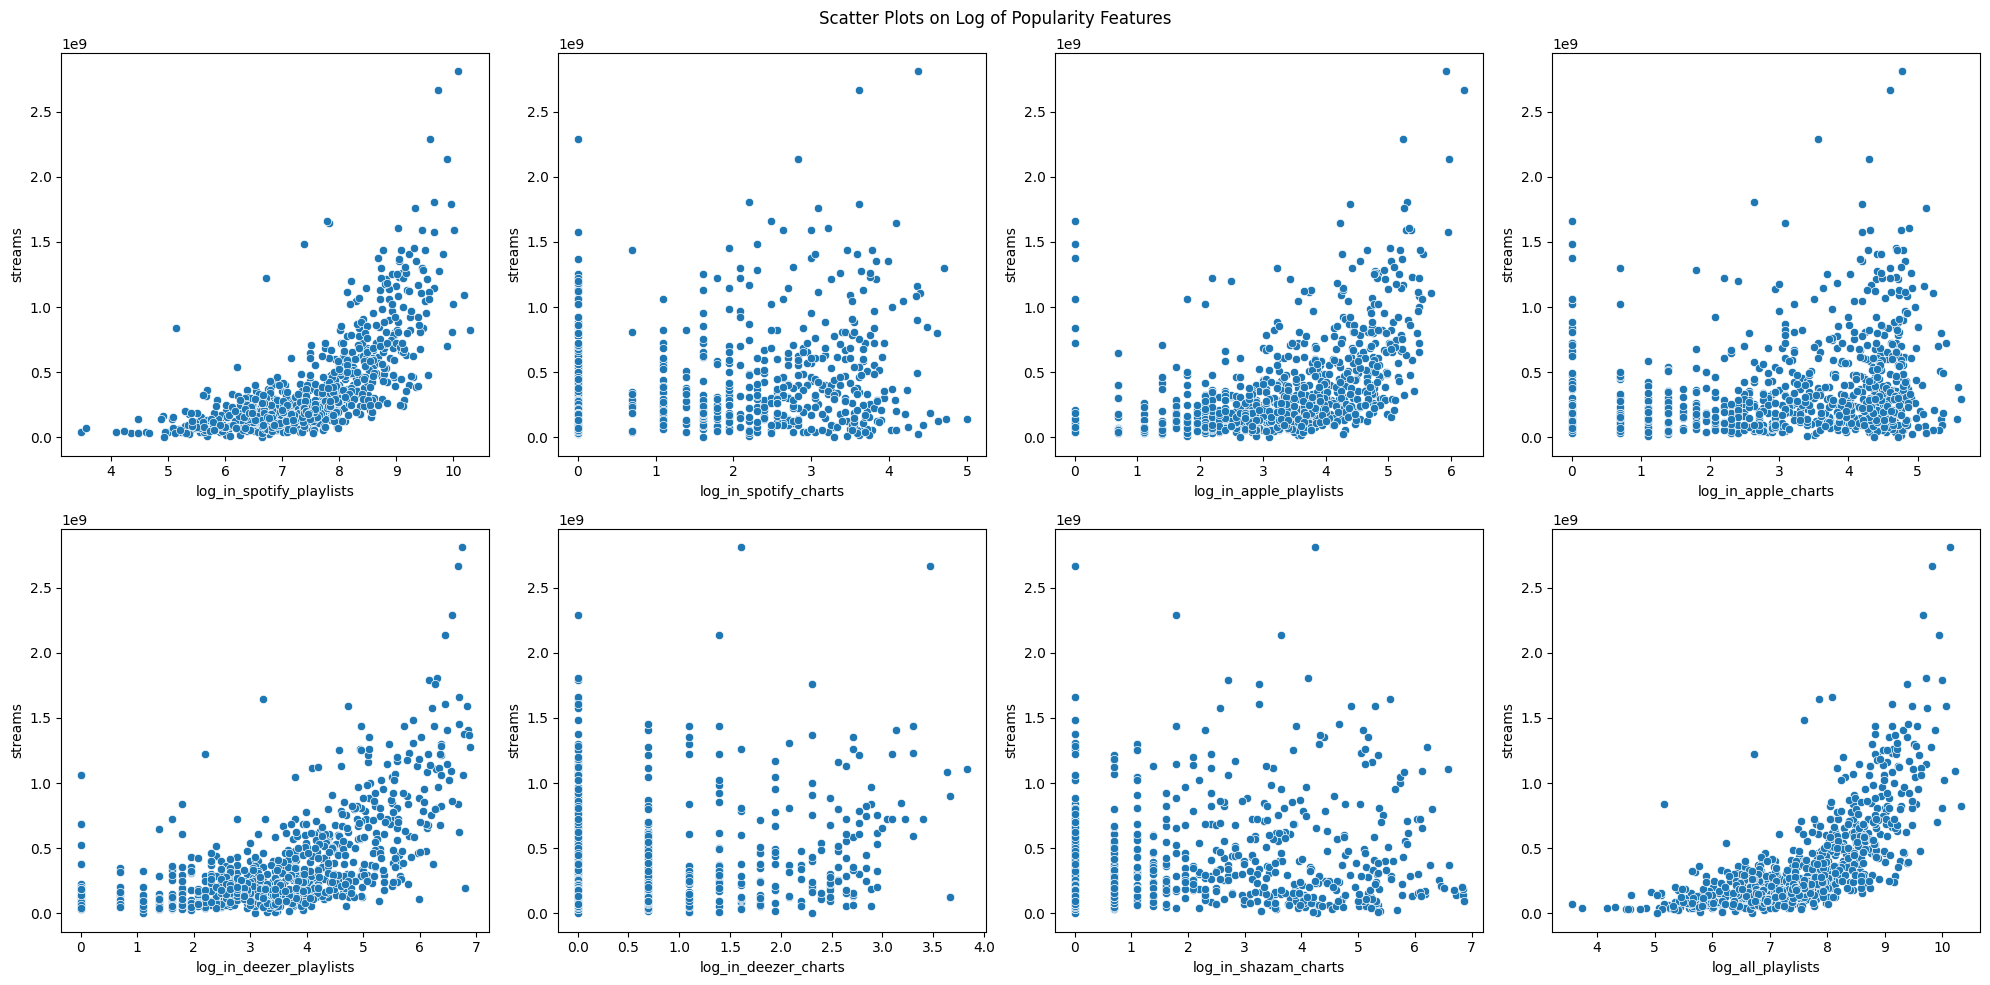

In [12]:
log_popularity_features = num_features[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
                                        'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'streams']]

log_popularity_features['all_playlists'] = log_popularity_features[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)

for feat in log_popularity_features.columns:
    log_popularity_features[f'log_{feat}'] = np.log(log_popularity_features[feat] + 1)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.scatterplot(log_popularity_features, x='log_in_spotify_playlists', y='streams', ax=axes[0, 0])
sns.scatterplot(log_popularity_features, x='log_in_spotify_charts', y='streams', ax=axes[0, 1])
sns.scatterplot(log_popularity_features, x='log_in_apple_playlists', y='streams', ax=axes[0, 2])
sns.scatterplot(log_popularity_features, x='log_in_apple_charts', y='streams', ax=axes[0, 3])
sns.scatterplot(log_popularity_features, x='log_in_deezer_playlists', y='streams', ax=axes[1, 0])
sns.scatterplot(log_popularity_features, x='log_in_deezer_charts', y='streams', ax=axes[1, 1])
sns.scatterplot(log_popularity_features, x='log_in_shazam_charts', y='streams', ax=axes[1, 2])
sns.scatterplot(log_popularity_features, x='log_all_playlists', y='streams', ax=axes[1, 3])

fig.suptitle('Scatter Plots on Log of Popularity Features')
fig.tight_layout()
fig.savefig('./images/scatter_plot_log_popularity_feautures.png')

In [13]:
for feat in log_popularity_features.columns:
    print(f'Pearson Correlation ({feat}): {pearsonr(log_popularity_features[feat], log_popularity_features["streams"])}')

Pearson Correlation (in_spotify_playlists): PearsonRResult(statistic=0.765095133762172, pvalue=2.8935738254570303e-160)
Pearson Correlation (in_spotify_charts): PearsonRResult(statistic=0.24547491401059374, pvalue=7.661519451646356e-13)
Pearson Correlation (in_apple_playlists): PearsonRResult(statistic=0.66365716791473, pvalue=2.2634726785661575e-106)
Pearson Correlation (in_apple_charts): PearsonRResult(statistic=0.2508103705228831, pvalue=2.336653823372952e-13)
Pearson Correlation (in_deezer_playlists): PearsonRResult(statistic=0.7185929567352471, pvalue=1.3493913931029803e-132)
Pearson Correlation (in_deezer_charts): PearsonRResult(statistic=0.2594696319716499, pvalue=3.203200693616326e-14)
Pearson Correlation (in_shazam_charts): PearsonRResult(statistic=0.058745697038613556, pvalue=0.09096386980352068)
Pearson Correlation (bpm): PearsonRResult(statistic=0.03271642513358447, pvalue=0.34680038810668506)
Pearson Correlation (streams): PearsonRResult(statistic=0.9999999999999998, pvalu

#### Missing Value Analysis

<Figure size 1000x600 with 0 Axes>

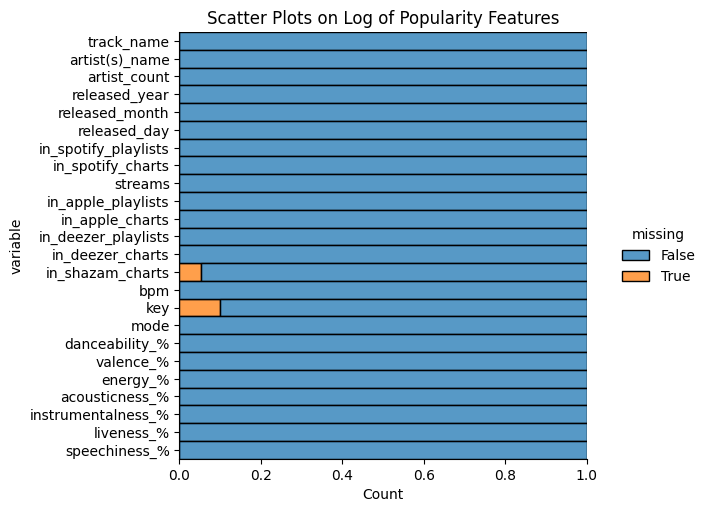

In [14]:
plt.figure(figsize=(10,6))
sns.displot(data=input_data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)

plt.title('Scatter Plots on Log of Popularity Features')
plt.savefig("./images/missing_values.png")

### Miscellaneous Features Analysis

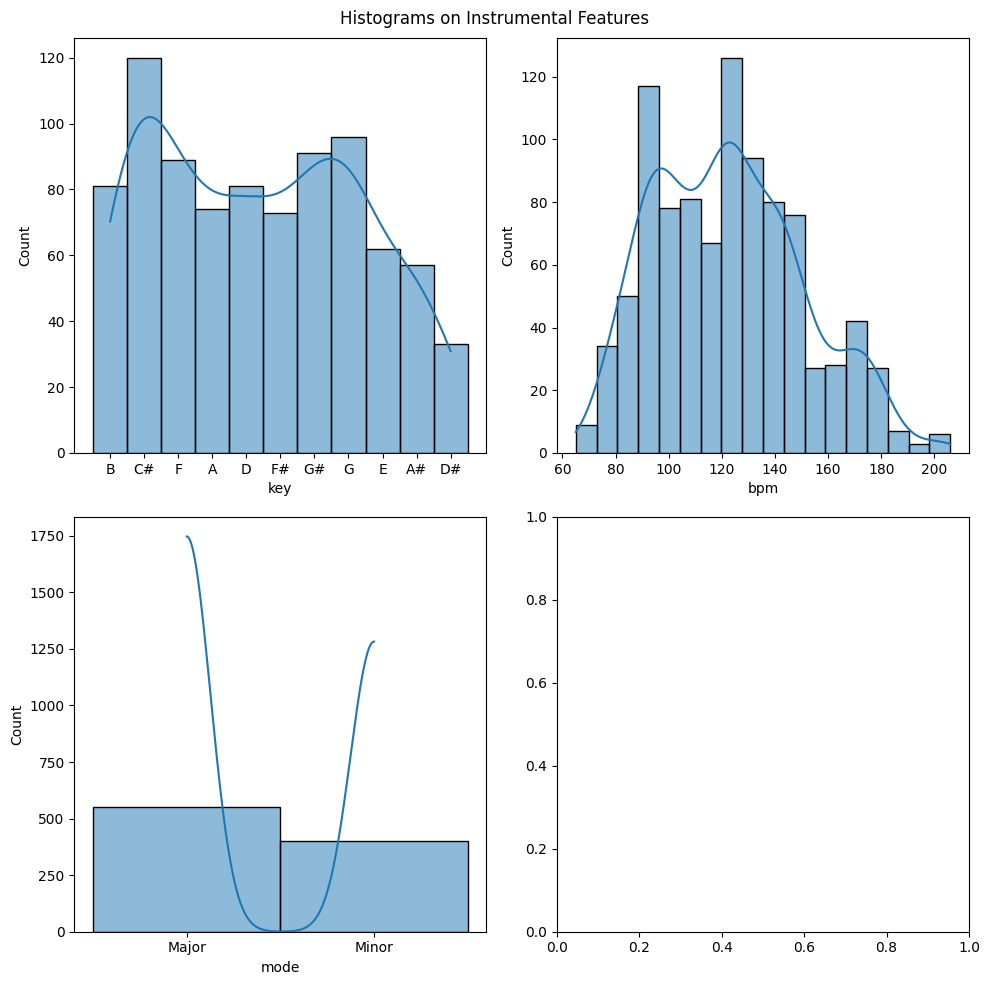

In [15]:
instrument_features = input_data[['bpm', 'key', 'mode']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.histplot(data=instrument_features, x="key", kde=True, ax=axes[0, 0])
sns.histplot(data=instrument_features, x="bpm", kde=True, ax=axes[0, 1])
sns.histplot(data=instrument_features, x="mode", kde=True, ax=axes[1, 0])

fig.suptitle('Histograms on Instrumental Features')
fig.tight_layout()
fig.savefig('./images/histograms_instrumental_feautures.png')

In [16]:
instrument_features = pd.get_dummies(instrument_features, columns=['key', 'mode'])

for feat in instrument_features.columns:
    print(f'Pearson Correlation ({feat}): {pearsonr(instrument_features[feat], input_data["streams"])}')

Pearson Correlation (bpm): PearsonRResult(statistic=-0.002437908138271801, pvalue=0.9401178701572734)
Pearson Correlation (key_A): PearsonRResult(statistic=-0.05395544405625988, pvalue=0.09615381613385589)
Pearson Correlation (key_A#): PearsonRResult(statistic=0.017076946652991056, pvalue=0.59871679378226)
Pearson Correlation (key_B): PearsonRResult(statistic=0.002804595732347985, pvalue=0.9311318565729807)
Pearson Correlation (key_C#): PearsonRResult(statistic=0.060424749547035216, pvalue=0.062373839364323336)
Pearson Correlation (key_D): PearsonRResult(statistic=0.008282742110316344, pvalue=0.7985466492956748)
Pearson Correlation (key_D#): PearsonRResult(statistic=0.013010490745001236, pvalue=0.6884777653327425)
Pearson Correlation (key_E): PearsonRResult(statistic=0.029516790645616183, pvalue=0.36296627853984514)
Pearson Correlation (key_F): PearsonRResult(statistic=-0.025898544125990682, pvalue=0.4247715069398211)
Pearson Correlation (key_F#): PearsonRResult(statistic=0.00418404142

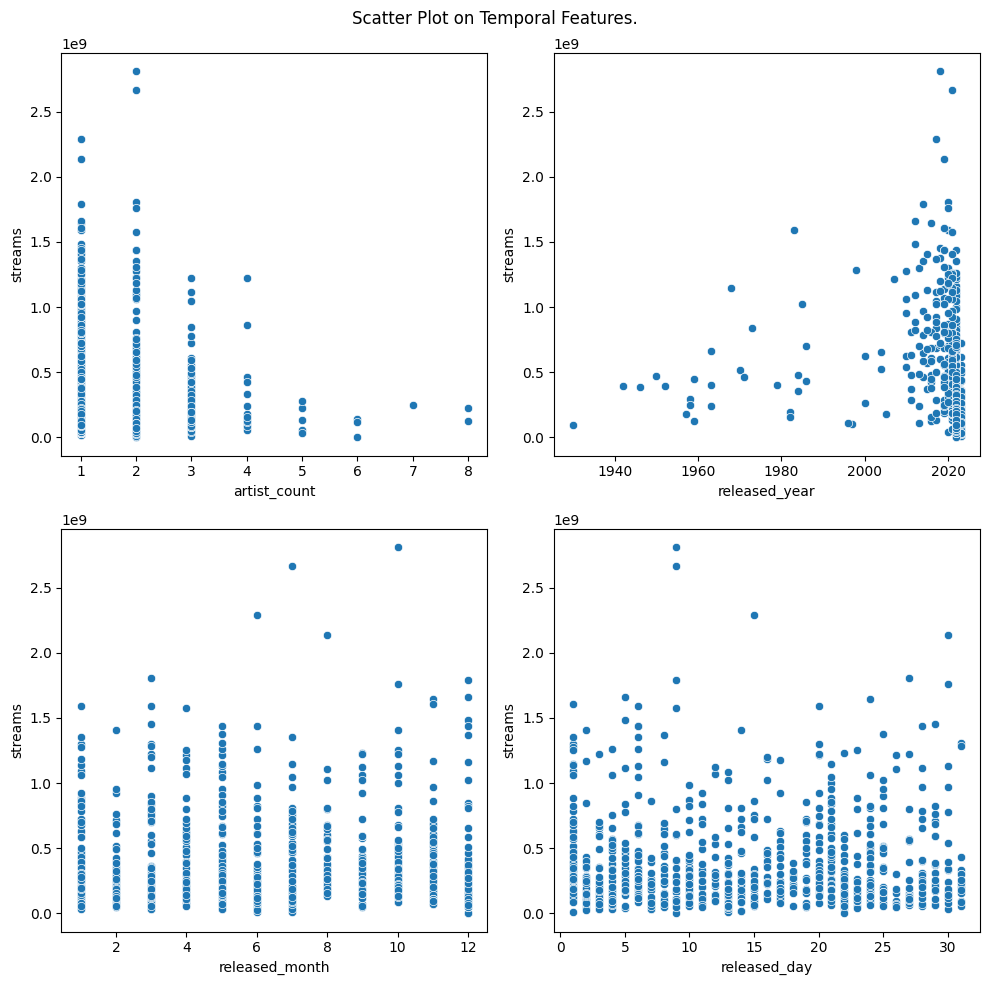

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(num_features, x='artist_count', y='streams', ax=axes[0, 0])
sns.scatterplot(num_features, x='released_year', y='streams', ax=axes[0, 1])
sns.scatterplot(num_features, x='released_month', y='streams', ax=axes[1, 0])
sns.scatterplot(num_features, x='released_day', y='streams', ax=axes[1, 1])

fig.suptitle('Scatter Plot on Temporal Features.')
fig.tight_layout()
fig.savefig('./images/scatter_plot_temporal_feautures.png')

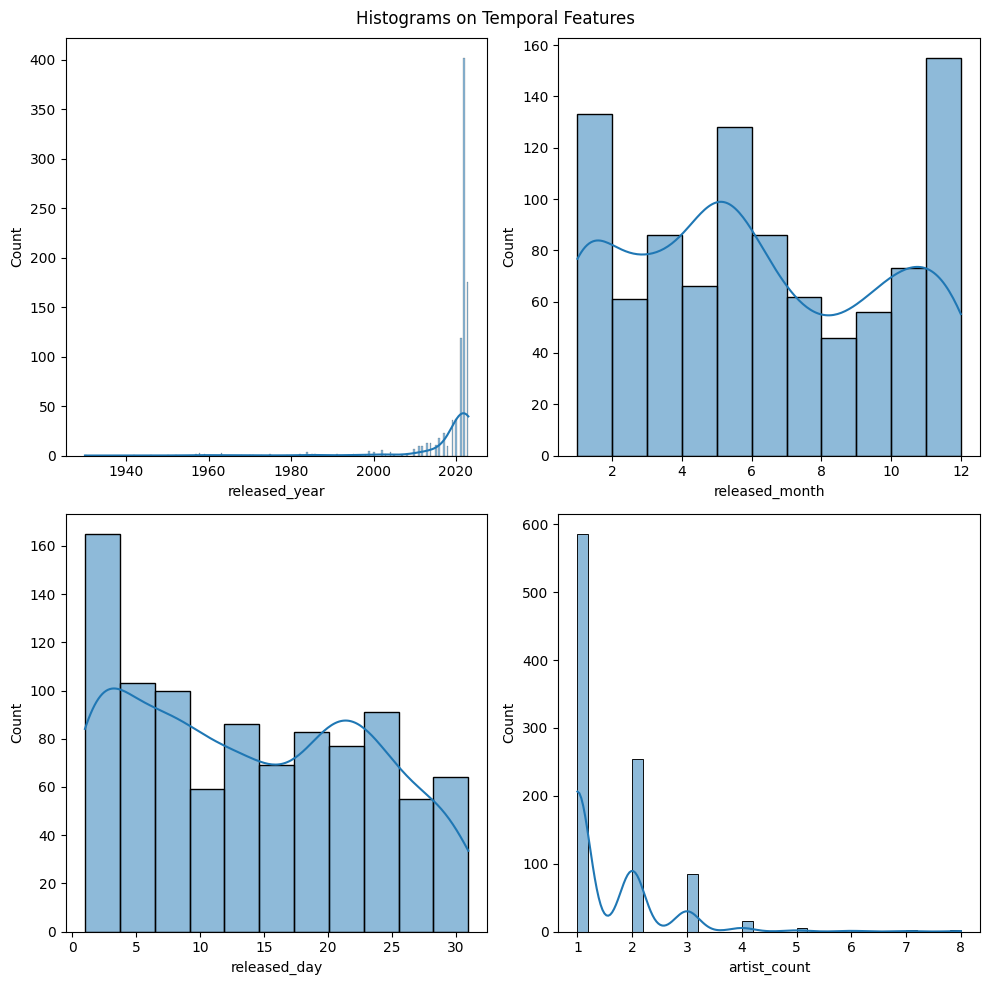

In [18]:
temporal_features = input_data[['artist_count', 'released_year', 'released_month', 'released_day']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.histplot(data=temporal_features, x="released_year", kde=True, ax=axes[0, 0])
sns.histplot(data=temporal_features, x="released_month", kde=True, ax=axes[0, 1])
sns.histplot(data=temporal_features, x="released_day", kde=True, ax=axes[1, 0])
sns.histplot(data=temporal_features, x="artist_count", kde=True, ax=axes[1, 1])


fig.suptitle('Histograms on Temporal Features')
fig.tight_layout()
fig.savefig('./images/histograms_temporal_feautures.png')

In [19]:
for feat in temporal_features.columns:
    print(f'Pearson Correlation ({feat}): {pearsonr(temporal_features[feat], input_data["streams"])}')

Pearson Correlation (artist_count): PearsonRResult(statistic=-0.13646347478241774, pvalue=2.3919729860017945e-05)
Pearson Correlation (released_year): PearsonRResult(statistic=-0.23080298001658367, pvalue=5.615320112959894e-13)
Pearson Correlation (released_month): PearsonRResult(statistic=-0.024937928598855266, pvalue=0.44215701869160146)
Pearson Correlation (released_day): PearsonRResult(statistic=0.010597940412743078, pvalue=0.7439903509268516)


### Data Cleaning and Pre-Processing

In [20]:
input_data = pd.read_csv('./spotify-2023.csv', encoding='ISO-8859-1')

# Cleaning the target variable of invalid values
input_data['streams'] = pd.to_numeric(input_data['streams'], errors='coerce')
input_data = input_data[~input_data['streams'].isna()]

input_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


In [21]:
class DataPreProcessing:

    @staticmethod
    def remove_redundant_features(input_data: pd.DataFrame, drop_cols_list: list) -> pd.DataFrame:
        return input_data.drop(columns=drop_cols_list)

    @staticmethod
    def fill_missing_keys(input_data: pd.DataFrame, fill_feature: str, reference_feature: str) -> pd.DataFrame:
        null_key_data = input_data[input_data[fill_feature].isna()]

        for artist_name in null_key_data[reference_feature]:
            artist_list = artist_name.split(', ')
            modes_list = []

            for artist in artist_list:
                artist_data = input_data[input_data[reference_feature].str.contains(artist)]
                modes_list.extend(artist_data[fill_feature].dropna().mode().tolist())

            null_data = artist_data[artist_data[fill_feature].isna()]

            if modes_list:
                input_data.loc[null_data.index, fill_feature] = input_data.loc[null_data.index, fill_feature].fillna(statistics.mode(modes_list))
            else:
                input_data.loc[null_data.index, fill_feature] = 'NA'

        return input_data

    @staticmethod
    def handling_missing_values(input_data: pd.DataFrame, feature_list: list) -> pd.DataFrame:
        input_data[feature_list] = input_data[feature_list].fillna('0')

        return input_data

In [22]:
log_features = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'all_playlists', 'speechiness_%', 'danceability_%']

input_data = DataPreProcessing.fill_missing_keys(input_data=input_data, fill_feature='key', reference_feature='artist(s)_name')
input_data = DataPreProcessing.remove_redundant_features(input_data=input_data, drop_cols_list=['track_name', 'artist(s)_name'])
input_data = DataPreProcessing.handling_missing_values(input_data=input_data, feature_list=['in_shazam_charts'])

input_data['in_deezer_playlists'] = input_data['in_deezer_playlists'].str.replace(',', '')
input_data['in_deezer_playlists'] = pd.to_numeric(input_data['in_deezer_playlists'])

input_data['in_shazam_charts'] = input_data['in_shazam_charts'].str.replace(',', '')
input_data['in_shazam_charts'] = pd.to_numeric(input_data['in_shazam_charts'])

input_data = pd.get_dummies(input_data, columns=['key', 'mode'], dtype=int)
input_data['new_releases_2010'] = np.where(input_data['released_year'] > 2010, 1, 0)

input_data['all_playlists'] = input_data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)

for feat in log_features:
    input_data[f'log_{feat}'] = np.log(input_data[feat] + 1)

In [23]:
input_data.to_csv('./input_data.csv', index=False)

input_data.columns

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'key_A', 'key_A#', 'key_B', 'key_C#',
       'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#',
       'key_NA', 'mode_Major', 'mode_Minor', 'new_releases_2010',
       'all_playlists', 'log_in_spotify_playlists', 'log_in_apple_playlists',
       'log_in_deezer_playlists', 'log_all_playlists', 'log_speechiness_%',
       'log_danceability_%'],
      dtype='object')

### Model Building

In [24]:
def train_test_split(X: pd.DataFrame, y: pd.Series, test_ratio: float) -> tuple:
    suffled_index = np.random.permutation(X.index)
    test_records = int(test_ratio * X.shape[0])

    X = X.reindex(suffled_index).reset_index(drop=True)
    y = y.reindex(suffled_index).reset_index(drop=True)

    return (
        X.iloc[test_records:].reset_index(drop=True), X.iloc[:test_records].reset_index(drop=True),
        y.iloc[test_records:].reset_index(drop=True), y.iloc[:test_records].reset_index(drop=True))

In [25]:
class MinMaxScalar:

    def __init__(self):
        self.min_ = None
        self.max_ = None

    def fit(self, X):
        self.min_ = X.min()
        self.max_ = X.max()

        return self

    def transform(self, X):
        if self.min_ is None or self.max_ is None:
            raise ValueError("Scaler not fitted. Call fit() before transform().")

        X_scaled = (X - self.min_) / (self.max_ - self.min_)
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def inverse_transform(self, X):
        X_original = (X * (self.max_ - self.min_)) + self.min_
        return X_original


class Scoring_Metrics:

    @staticmethod
    def _r_squared(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        if len(y_true) != len(y_pred):
            raise ValueError("Input arrays must have the same length!")

        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        total_sum_squares = np.sum((y_true - np.mean(y_true)) ** 2)
        residual_sum_squares = np.sum((y_true - y_pred) ** 2)

        return 1 - (residual_sum_squares / total_sum_squares)

    @staticmethod
    def _rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

    @staticmethod
    def _mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return np.mean((y_true - y_pred) ** 2)


class Cross_Validation:

    def __init__(self, estimator: object, n_splits: int = 5, shuffle: bool = True, scoring: str = 'r_squred') -> None:
        self.estimator = estimator
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.scoring = scoring

        self.indices = None
        self.scoring_metric_list = []
        self.scorers = {
            'r_squred': Scoring_Metrics._r_squared,
            'rmse': Scoring_Metrics._rmse
        }

    def _split(self, X: pd.DataFrame) -> Generator:
        indices = np.arange(len(X))

        if self.shuffle:
            indices = np.random.permutation(indices)

        self.indices = np.array_split(indices, self.n_splits)

        for i in range(self.n_splits):
            train_indices = np.concatenate([self.indices[j] for j in range(self.n_splits) if j != i])
            test_indices = self.indices[i]

            yield train_indices, test_indices

    def fit(self, X: pd.DataFrame, y: pd.Series, **model_kwargs: dict) -> float:
        self.scoring_metric_list = []

        for train_index, test_index in self._split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            self.estimator.fit(X_train, y_train, **model_kwargs)
            y_pred = self.estimator.predict(X_test)

            self.scoring_metric_list.append(self.scorers[self.scoring](y_true=y_test, y_pred=y_pred))

        return np.mean(self.scoring_metric_list)


class Linear_Regression:

    def __init__(self, learning_rate: float = 0.1, num_iterations: int = 1000, fit_intercept: bool = True, C: float = 1) -> None:
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.C = C

        self.coef_ = None
        self.intercept_ = None

    def loss_function(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        if len(y_true) != len(y_pred):
            raise ValueError("Input arrays must have the same length!")

        return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)

    def fit(self, X: pd.DataFrame, y: pd.Series, verbose: bool = False, regularization: bool = False) -> Self:
        num_samples, num_features = X.shape
        self.coef_ = np.random.uniform(size=num_features)

        if self.fit_intercept:
            self.intercept_ = np.random.uniform()

        for itr_num in range(self.num_iterations):
            y_pred = np.dot(X, self.coef_)

            if self.fit_intercept:
                y_pred += self.intercept_

            if verbose:
                print(f'Iteration {itr_num + 1}, Current Loss (MSE): {self.loss_function(y_true=y, y_pred=y_pred):.5f}')

            dw, db = None, None

            if regularization:
                dw = (2/num_samples) * (np.dot(X.T, (y_pred - y)) + (self.C * self.coef_))
                db = (2/num_samples) * (np.sum(y_pred - y) + (self.C * self.intercept_))

            else:
                dw = (2/num_samples) * np.dot(X.T, (y_pred - y))
                db = (2/num_samples) * np.sum(y_pred - y)

            self.coef_ -= self.learning_rate * dw

            if self.fit_intercept:
                self.intercept_ -= self.learning_rate * db

        print(f'Final Loss (MSE): {self.loss_function(y_true=y, y_pred=y_pred):.5f}')

        return self

    def predict(self, X: pd.DataFrame):
        if self.fit_intercept:
            return np.dot(X, self.coef_) + self.intercept_

        return np.dot(X, self.coef_)

    def score(self, X: pd.DataFrame, y: pd.Series) -> float:
        return Scoring_Metrics._r_squared(y_true=y, y_pred=self.predict(X))

In [26]:
x_scalar = MinMaxScalar()
y_scalar = MinMaxScalar()

y = input_data['streams']
X = input_data.drop(columns=['streams', 'valence_%', 'energy_%', 'acousticness_%', 'released_month', 'released_day', 'bpm', 'instrumentalness_%', 'liveness_%'])

X_train, X_test, y_train, y_test = train_test_split(X=X, y=y, test_ratio=0.2)
X_train, X_val, y_train, y_val = train_test_split(X=X_train, y=y_train, test_ratio=0.2)

y_train = y_scalar.fit_transform(y_train)
y_val = y_scalar.transform(y_val)
y_test = y_scalar.transform(y_test)

X_train = x_scalar.fit_transform(X_train)
X_val = x_scalar.transform(X_val)
X_test = x_scalar.transform(X_test)

X_train.columns

Index(['artist_count', 'released_year', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
       'danceability_%', 'speechiness_%', 'key_A', 'key_A#', 'key_B', 'key_C#',
       'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#',
       'key_NA', 'mode_Major', 'mode_Minor', 'new_releases_2010',
       'all_playlists', 'log_in_spotify_playlists', 'log_in_apple_playlists',
       'log_in_deezer_playlists', 'log_all_playlists', 'log_speechiness_%',
       'log_danceability_%'],
      dtype='object')

In [27]:
model = Linear_Regression(learning_rate=0.1, num_iterations=8000).fit(X_train, y_train, verbose=False, regularization=True)

print(f'RMSE Score (Train Data): {Scoring_Metrics._rmse(y_train, model.predict(X_train)):.5f}')
print(f'R-Squared Score (Train Data): {model.score(X_train, y_train):.5f}\n')

cross_val_score = Cross_Validation(estimator=Linear_Regression(learning_rate=0.1, num_iterations=8000))
score = cross_val_score.fit(X_train, y_train, regularization=True)

print(f'Cross Validation Score ({cross_val_score.scoring}): {score:.5f}\n')

y_val_pred = model.predict(X_val)

print(f'RMSE Score (Validation Data): {Scoring_Metrics._rmse(y_val, y_val_pred):.5f}')
print(f'MSE Score (Validation Data): {Scoring_Metrics._mse(y_val, y_val_pred):.5f}')
print(f'R-Squared Score (Validation Data): {Scoring_Metrics._r_squared(y_val, y_val_pred):.5f}')

Final Loss (MSE): 0.00533
RMSE Score (Train Data): 0.07298
R-Squared Score (Train Data): 0.78150

Final Loss (MSE): 0.00493
Final Loss (MSE): 0.00548
Final Loss (MSE): 0.00521
Final Loss (MSE): 0.00533
Final Loss (MSE): 0.00544
Cross Validation Score (r_squred): 0.74460

RMSE Score (Validation Data): 0.07530
MSE Score (Validation Data): 0.00567
R-Squared Score (Validation Data): 0.84172


### Model Evaluation

In [28]:
model = Linear_Regression(learning_rate=0.1, num_iterations=8000)

train_sizes = np.linspace(0.1, 1.0, 10)

train_r_squared_scores, val_r_squared_scores = [], []
train_rmse, val_rmse = [], []

for size in train_sizes:
    num_samples = int(size * len(X_train))
    X_train_subset, y_train_subset = X_train[:num_samples], y_train[:num_samples]

    model.fit(X_train_subset, y_train_subset, verbose=False, regularization=True)

    y_train_pred = model.predict(X_train_subset)
    y_val_pred = model.predict(X_val)

    train_r_squared_scores.append(Scoring_Metrics._r_squared(y_train_subset, y_train_pred))
    val_r_squared_scores.append(Scoring_Metrics._r_squared(y_val, y_val_pred))

    train_rmse.append(Scoring_Metrics._rmse(y_train_subset, y_train_pred))
    val_rmse.append(Scoring_Metrics._rmse(y_val, y_val_pred))

Final Loss (MSE): 0.00886
Final Loss (MSE): 0.00802
Final Loss (MSE): 0.00710
Final Loss (MSE): 0.00683
Final Loss (MSE): 0.00647
Final Loss (MSE): 0.00608
Final Loss (MSE): 0.00565
Final Loss (MSE): 0.00565
Final Loss (MSE): 0.00552
Final Loss (MSE): 0.00533


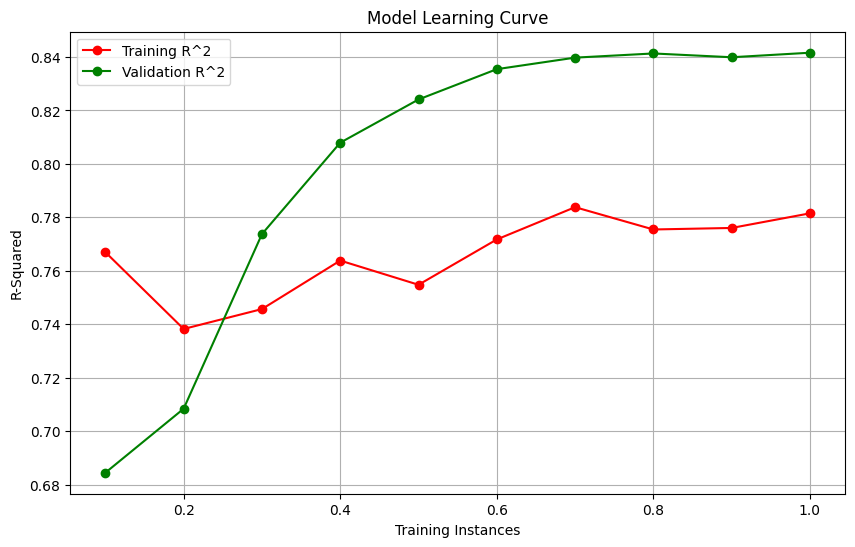

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_r_squared_scores, 'o-', color="r", label="Training R^2")
plt.plot(train_sizes, val_r_squared_scores, 'o-', color="g", label="Validation R^2")
plt.xlabel("Training Instances")
plt.ylabel("R-Squared")
plt.title("Model Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('./images/model_learning_curve.png')
plt.show()

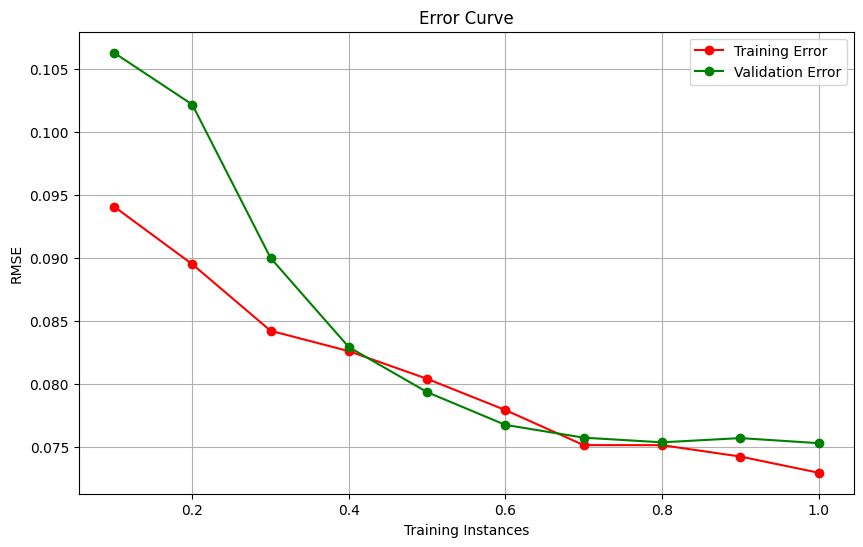

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', color="r", label="Training Error")
plt.plot(train_sizes, val_rmse, 'o-', color="g", label="Validation Error")
plt.xlabel("Training Instances")
plt.ylabel("RMSE")
plt.title("Error Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('./images/error_curve.png')
plt.show()

### Final Model on Test Data

In [31]:
X_train = pd.concat([X_train, X_val], ignore_index=True)
y_train = pd.concat([y_train, y_val], ignore_index=True)

model = Linear_Regression(learning_rate=0.1, num_iterations=8000).fit(X_train, y_train, verbose=False, regularization=True)

print(f'RMSE Score (Train Data): {Scoring_Metrics._rmse(y_train, model.predict(X_train)):.5f}')
print(f'R-Squared Score (Train Data): {model.score(X_train, y_train):.5f}\n')

cross_val_score = Cross_Validation(estimator=Linear_Regression(learning_rate=0.1, num_iterations=8000))
score = cross_val_score.fit(X_train, y_train, regularization=True)

print(f'Cross Validation Score ({cross_val_score.scoring}): {score:.5f}\n')

y_test_pred = model.predict(X_test)

print(f'RMSE Score (Validation Data): {Scoring_Metrics._rmse(y_test, y_test_pred):.5f}')
print(f'MSE Score (Validation Data): {Scoring_Metrics._mse(y_test, y_test_pred):.5f}')
print(f'R-Squared Score (Validation Data): {Scoring_Metrics._r_squared(y_test, y_test_pred):.5f}')

Final Loss (MSE): 0.00533
RMSE Score (Train Data): 0.07299
R-Squared Score (Train Data): 0.80060

Final Loss (MSE): 0.00505
Final Loss (MSE): 0.00476
Final Loss (MSE): 0.00586
Final Loss (MSE): 0.00511
Final Loss (MSE): 0.00563
Cross Validation Score (r_squred): 0.77876

RMSE Score (Validation Data): 0.07218
MSE Score (Validation Data): 0.00521
R-Squared Score (Validation Data): 0.73127


## Trying Different Models

### Neural Network

In [ ]:
class Neural_Network_Regressor:

    def __init__(self, input_dim: int = 1, output_dim: int = 1, hidden_layers: list = [3], lr: float = 0.001) -> None:
        self.hidden_layers = hidden_layers
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.lr = lr

        self.weights = []
        self.z = []
        self.activation = []
        self.y_hat = None
        self.loss = None

        self._generate_weights()

    def _generate_weights(self) -> None:
        num_weights = len(self.hidden_layers) + 1
        prev_layer_dim = self.input_dim

        for j in range(num_weights - 1):
            curr_layer_dim = self.hidden_layers[j]
            curr_weights = np.random.normal(size=(prev_layer_dim, curr_layer_dim))
            self.weights.append(curr_weights)
            prev_layer_dim = curr_layer_dim

        curr_weights = np.random.normal(size=(prev_layer_dim, self.output_dim))
        self.weights.append(curr_weights)

        self.gradients = self.weights.copy()

    def feed_forward(self, X: np.ndarray) -> None:
        self.z = []
        self.activation = []

        activation = X
        self.activation.append(activation)

        for j in range(len(self.weights) - 1):
            z = np.dot(activation, self.weights[j])
            self.z.append(z)

            activation = np.maximum(z, np.zeros(z.shape))
            # activation = np.maximum(z, 0.01 * z)

            self.activation.append(activation)

        self.y_hat = np.dot(activation, self.weights[-1])

    def backward_propogation(self, X: np.ndarray, y: np.ndarray):
        self.loss = np.mean(np.power(y - self.y_hat, 2))

        dloss_dy_hat = np.round(-2 * (y - self.y_hat) / X.shape[0], 2)
        gradient = np.dot(self.activation[-1].T, dloss_dy_hat)
        self.gradients[-1] = gradient

        prev_grad = dloss_dy_hat

        for j in range(len(self.weights) - 1, 0, -1):
            dprev_dz = np.round(np.dot(prev_grad, self.weights[j].T), 2)

            dprev_dz[self.z[j-1] <= 0] = 0
            # dprev_dz[self.z[j-1] > 0] = 1

            self.gradients[j-1] = np.dot(self.activation[j-1].T, dprev_dz)
            prev_grad = dprev_dz

        for g in range(len(self.gradients)):
            self.weights[g] -= self.gradients[g] * self.lr

    def compile(self, X: np.ndarray, y: np.ndarray, epochs: int = 100) -> Self:
        for j in range(epochs):
            self.feed_forward(X.values)
            self.backward_propogation(X.values, y.values.reshape(-1, 1))

        print(f'Final Loss: {self.loss:.4f}')

        return self

    def predict(self, X: np.ndarray) -> None:
        activation = X

        for j in range(len(self.weights) - 1):
            z = np.dot(activation, self.weights[j])
            activation = np.maximum(z, np.zeros(z.shape))

        return np.dot(activation, self.weights[-1])

In [ ]:
x_scalar = MinMaxScalar()
y_scalar = MinMaxScalar()

features_to_scale = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'artist_count', 'liveness_%', 'speechiness_%', 'danceability_%', 'released_year']

y = input_data['streams']
X = input_data.drop(columns=['streams', 'valence_%', 'energy_%', 'acousticness_%', 'released_month', 'released_day', 'bpm', 'instrumentalness_%'])

X_train, X_test, y_train, y_test = train_test_split(X=X, y=y, test_ratio=0.2)

y_train = y_scalar.fit_transform(y_train)
y_test = y_scalar.transform(y_test)

X_train[features_to_scale] = x_scalar.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = x_scalar.transform(X_test[features_to_scale])

model = Neural_Network_Regressor(input_dim=X_train.shape[1], hidden_layers=[32, 32], lr=0.01)
model = model.compile(X_train, y_train, epochs=100)

y_pred = model.predict(X_test).reshape(-1)

print(f'RMSE Score (Test Data): {Scoring_Metrics._rmse(y_test, y_pred):.3f}')
print(f'MSE Score (Test Data): {Scoring_Metrics._mse(y_test, y_pred):.3f}')
print(f'R-Squared Score (Test Data): {Scoring_Metrics._r_squared(y_test, y_pred):.3f}')

### Random Forest Model

In [ ]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape

        if (self.max_depth is not None and depth >= self.max_depth) or num_samples < self.min_samples_split:
            return np.mean(y)

        best_variance_reduction = 0
        best_split = None
        initial_variance = np.var(y)

        for feature_idx in range(num_features):
            thresholds = np.unique(X.iloc[:, feature_idx])

            for threshold in thresholds:
                left_indices = np.where(X.iloc[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X.iloc[:, feature_idx] > threshold)[0]

                if len(left_indices) < self.min_samples_split or len(right_indices) < self.min_samples_split:
                    continue

                left_variance = np.var(y[left_indices])
                right_variance = np.var(y[right_indices])
                variance_reduction = initial_variance - (len(left_indices) / num_samples * left_variance + len(right_indices) / num_samples * right_variance)

                if variance_reduction > best_variance_reduction:
                    best_variance_reduction = variance_reduction
                    best_split = {'feature_idx': feature_idx, 'threshold': threshold,
                                  'left_indices': left_indices, 'right_indices': right_indices}

        if best_split is None:
            return np.mean(y)

        left_tree = self._grow_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right_tree = self._grow_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)

        return {'feature_idx': best_split['feature_idx'], 'threshold': best_split['threshold'],
                'left': left_tree, 'right': right_tree}

    def _predict_sample(self, x, tree):
        if isinstance(tree, float):
            return tree
        feature_idx, threshold = tree['feature_idx'], tree['threshold']
        if x[feature_idx] <= threshold:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

    def predict(self, X):
        predictions = [self._predict_sample(x, self.tree) for x in X]
        return np.array(predictions)


class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X.iloc[indices], y.iloc[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)


In [ ]:
x_scalar = MinMaxScalar()
y_scalar = MinMaxScalar()

features_to_scale = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'artist_count', 'liveness_%', 'speechiness_%']

y = input_data['streams']
X = input_data.drop(columns=['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'released_month', 'released_day', 'bpm', 'instrumentalness_%', 'released_year'])

X_train, X_test, y_train, y_test = train_test_split(X=X, y=y, test_ratio=0.2)

y_train = y_scalar.fit_transform(y_train)
X_train[features_to_scale] = x_scalar.fit_transform(X_train[features_to_scale])

X_test[features_to_scale] = x_scalar.transform(X_test[features_to_scale])

rf = RandomForestRegressor(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)

# # Make predictions
# X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# predictions = rf.predict(X_test)

## Assignment Question 2(E)

Plot for a hypothetical binary classification where the model underfits. Draw the curves for both training and validation scores as a function of the Training Instances size.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_sizes = np.linspace(0.1, 1.0, 10)
model = LogisticRegression()

train_scores, val_scores = [], []

for size in train_sizes:
    num_samples = int(size * len(X_train))
    X_train_subset, y_train_subset = X_train[:num_samples], y_train[:num_samples]

    model.fit(X_train_subset, y_train_subset)

    y_train_pred = model.predict(X_train_subset)
    y_val_pred = model.predict(X_val)

    train_scores.append(accuracy_score(y_train_subset, y_train_pred))
    val_scores.append(accuracy_score(y_val, y_val_pred))

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores, 'o-', color="g", label="Validation score")

plt.xlabel("Training Instances")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Underfitting)")

plt.legend(loc="best")
plt.grid()
plt.savefig('./underfitting_model.png')

plt.show()
